In [1]:
import iris
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import warnings
from eofs.iris import Eof
from eofs.examples import example_data_path
import iris.coord_categorisation
import datetime as dt
import iris.quickplot as qplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
reanalysis='era_interim_MSL_2019'
year1=1979
year2=2019

if reanalysis == 'era_interim_MSL':
    filename =  filename = 'ERA_interim_MSL.nc'
    outfile = 'NCEP_data_EOF_1_as_cov.png'
    data=iris.load(filename)
if reanalysis == 'era_interim_MSL_2019':
    filename =  filename = 'ERA_interim_MSL_1979-2012.nc'
    outfile = 'NCEP_data_EOF_1_as_cov.png'
    data=iris.load(filename)

mslp=data[0]
iris.coord_categorisation.add_season     (mslp, coord='t', name='clim_season')
iris.coord_categorisation.add_season_year(mslp, 't', name='season_year')

/opt/jaspy/lib/python3.8/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 'surface' invalid units 'level'
  warnings.warn(msg)


In [3]:
annual_seasonal_mean = mslp.aggregated_by(
  ['clim_season', 'season_year'],
  iris.analysis.MEAN)

air_pressure_at_sea_level / (Pa)    (t: 133; surface: 1; latitude: 256; longitude: 512)
    Dimension coordinates:
        t                             x             -            -               -
        surface                       -             x            -               -
        latitude                      -             -            x               -
        longitude                     -             -            -               x
    Auxiliary coordinates:
        clim_season                   x             -            -               -
        season_year                   x             -            -               -
    Cell methods:
        mean                        clim_season, season_year
    Attributes:
        name                        MSL
        source                      GRIB data
        time                        00:00
        title                       Mean sea-level pressure


In [4]:
cube3=annual_seasonal_mean.extract(iris.Constraint(clim_season='djf'))
z_djf=cube3 # convert to Pa
z_djf = z_djf.intersection(longitude=(-70,40), latitude=(25,80))
seasonal_means = z_djf

air_pressure_at_sea_level / (Pa)    (t: 34; surface: 1; latitude: 78; longitude: 156)
    Dimension coordinates:
        t                             x            -            -              -
        surface                       -            x            -              -
        latitude                      -            -            x              -
        longitude                     -            -            -              x
    Auxiliary coordinates:
        clim_season                   x            -            -              -
        season_year                   x            -            -              -
    Cell methods:
        mean                        clim_season, season_year
    Attributes:
        name                        MSL
        source                      GRIB data
        time                        00:00
        title                       Mean sea-level pressure


In [5]:
# Compute anomalies by removing the time-mean.
with warnings.catch_warnings():
  # Iris emits a warning due to the non-contiguous time dimension.
  warnings.simplefilter('ignore', UserWarning)
z_djf_mean = z_djf.collapsed('t', iris.analysis.MEAN)
z_djf = z_djf - z_djf_mean
z_djf = z_djf.intersection(longitude=(-70,40), latitude=(25,80))


unknown / (Pa)                      (t: 34; surface: 1; latitude: 78; longitude: 156)
    Dimension coordinates:
        t                             x            -            -              -
        surface                       -            x            -              -
        latitude                      -            -            x              -
        longitude                     -            -            -              x
    Auxiliary coordinates:
        clim_season                   x            -            -              -
        season_year                   x            -            -              -
    Attributes:
        name                        MSL
        source                      GRIB data
        time                        00:00
        title                       Mean sea-level pressure


/opt/jaspy/lib/python3.8/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 't'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.8/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))


In [6]:
pc = iris.load('pcs_era_interim_1979-2012.nc')
pcs = pc[0]
print(pc[0].data)

[[-1.6176105 ]
 [-0.4571641 ]
 [ 0.70827705]
 [-0.9031996 ]
 [ 1.0952283 ]
 [ 0.6304971 ]
 [-1.1777291 ]
 [-1.0305417 ]
 [-0.70257777]
 [-0.41364548]
 [ 1.6709028 ]
 [ 0.71644   ]
 [ 0.27648708]
 [ 0.9573113 ]
 [ 1.2380037 ]
 [ 0.06239036]
 [ 1.1629529 ]
 [-1.4692761 ]
 [-0.14824553]
 [-0.2400018 ]
 [ 0.7777282 ]
 [ 1.3805437 ]
 [-0.8346046 ]
 [ 0.2838667 ]
 [-0.6657331 ]
 [-0.33000988]
 [ 0.77142507]
 [-0.55020386]
 [ 0.6129505 ]
 [ 0.6696853 ]
 [-0.35241035]
 [-2.4683933 ]
 [-1.026955  ]
 [ 1.3736115 ]]


In [7]:
NAOI_JW = np.loadtxt('NAO_I_J&W.csv')
NAOI_Jones = np.loadtxt('NAO_I_Jones_1978-2011.csv')

[-1.70996249 -0.44344825  0.15115589 -0.59976876  0.55135393  0.64717895
 -1.15028894 -0.86669213 -0.80006105 -0.15877901  1.70065582  1.5201546
  0.43442839  0.59870523  0.92015064  0.39901155  1.21731555 -1.55190861
 -0.00375544 -0.32880488  0.92354268  1.31620836 -0.51410735  0.10815684
 -0.40950292 -0.6253587   0.09983887 -0.7972427   0.89302683  0.80747765
 -0.12084308 -2.61153364 -1.18530667  1.58900547]
[-1.65600068 -0.2023939   0.23193715 -0.41934588  0.92222599  0.94813495
 -0.89752287 -1.23206169 -0.38233308 -0.38631907  1.74291379  1.66589868
  0.30197677  0.55224028  0.78043847  0.49572457  1.70362327 -1.69771127
 -0.61821854  0.12773186  0.93532283  1.02073699 -0.7638497   0.11577388
 -0.31841481 -0.82691382 -0.18289099 -0.71459419  0.7257734   0.86556792
 -0.28652685 -2.48067448 -1.03874096  0.96849199]


In [8]:
ivar =0
jvar=0
np.corrcoef(np.array(pcs.data[:,0]),seasonal_means.data[:,0,ivar,jvar])
filename = 'ERA_interim_MSL_1979-2012.nc'
outfile = 'NCEP_data_EOF_1_as_cov.png'
data=iris.load(filename)
mslp = data[0]
iris.coord_categorisation.add_season     (mslp, coord='t', name='clim_season')
iris.coord_categorisation.add_season_year(mslp, 't', name='season_year')
annual_seasonal_mean = mslp.aggregated_by(
  ['clim_season', 'season_year'],
  iris.analysis.MEAN)
print(annual_seasonal_mean)
cube3=annual_seasonal_mean.extract(iris.Constraint(clim_season='djf'))
z_djf=cube3 # convert to Pa
z_djf = z_djf.intersection(longitude=(-90,60), latitude=(25,90))
print(z_djf)
print(z_djf.coords('t'))




/opt/jaspy/lib/python3.8/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 'surface' invalid units 'level'
  warnings.warn(msg)


air_pressure_at_sea_level / (Pa)    (t: 133; surface: 1; latitude: 256; longitude: 512)
    Dimension coordinates:
        t                             x             -            -               -
        surface                       -             x            -               -
        latitude                      -             -            x               -
        longitude                     -             -            -               x
    Auxiliary coordinates:
        clim_season                   x             -            -               -
        season_year                   x             -            -               -
    Cell methods:
        mean                        clim_season, season_year
    Attributes:
        name                        MSL
        source                      GRIB data
        time                        00:00
        title                       Mean sea-level pressure
air_pressure_at_sea_level / (Pa)    (t: 34; surface: 1; latitude: 92; longitu

In [9]:
#correlation_map
correls_PC=np.empty([92,214])
for ivar in range(0,91):
    for jvar in range(0,213):
        
        correls_PC[ivar,jvar] = np.corrcoef(pcs.data[:,0],z_djf.data[:,0,ivar,jvar])[0,1]

#this creates a correlation map

#Jianping and Wang correlation map
NAOI_JW= np.loadtxt('NAO_I_J&W.csv')
correls_JW=np.empty([92,214])

for ivar in range(0,91):
    for jvar in range(0,213):
        
        correls_JW[ivar,jvar] = np.corrcoef(NAOI_JW,z_djf.data[:,0,ivar,jvar])[0,1]

#jones correlation map
NAOI_Jones = np.loadtxt('NAO_I_Jones_1978-2011.csv')

correls_Jones=np.empty([92,214])
for ivar in range(0,91):
    for jvar in range(0,213):
        
        correls_Jones[ivar,jvar] = np.corrcoef(NAOI_Jones,z_djf.data[:,0,ivar,jvar])[0,1]



[-0.71481253 -0.71553275 -0.71622573 -0.71687608 -0.71749729 -0.71808461
 -0.71863592 -0.71881216 -0.71872448 -0.71861117 -0.71847362 -0.71830584
 -0.71811082 -0.7178978  -0.71768882 -0.71743555 -0.71713239 -0.71678718
 -0.71640144 -0.71597209 -0.71651103 -0.71727951 -0.71802079 -0.71873849
 -0.71943301 -0.72010418 -0.72112697 -0.72268683 -0.7242111  -0.72569719
 -0.72714805 -0.72856622 -0.72994444 -0.73059681 -0.73122254 -0.73182344
 -0.73240062 -0.73295096 -0.73347861 -0.73400008 -0.73451723 -0.73502051
 -0.73551638 -0.73599732 -0.736469   -0.73695382 -0.73753663 -0.73810761
 -0.73865922 -0.73919548 -0.73972312 -0.74023463 -0.74097173 -0.74174728
 -0.74250152 -0.74323257 -0.74394647 -0.74463837 -0.74569598 -0.74730993
 -0.74889955 -0.75045934 -0.7519835  -0.75347937 -0.75494579 -0.75688376
 -0.75874462 -0.7605374  -0.76226465 -0.76392288 -0.76550621 -0.76671013
 -0.76758834 -0.7683462  -0.76898934 -0.76951785 -0.76993962 -0.77031154
 -0.77079954 -0.77115294 -0.7713824  -0.77148832 -0

In [10]:
lats=z_djf.coord('latitude').points
lons=z_djf.coord('longitude').points


[89.46294403 88.76694489 88.06699371 87.36603546 86.66480255 85.96337128
 85.26186371 84.56025696 83.85863495 83.15699005 82.45531464 81.75363922
 81.05194092 80.35023499 79.64852142 78.94680023 78.2450943  77.54336548
 76.8416214  76.13991547 75.43817139 74.73644257 74.03469849 73.33295441
 72.63122559 71.92948151 71.22775269 70.52600098 69.82426453 69.12252045
 68.42077637 67.71902466 67.01728821 66.3155365  65.61379242 64.91204834
 64.21029663 63.50854492 62.80679703 62.10505676 61.40330887 60.70155334
 59.99980545 59.29806137 58.59631348 57.89455795 57.19280624 56.49106216
 55.78931046 55.08755875 54.38580704 53.68406296 52.98231125 52.28055573
 51.57880402 50.87705994 50.17530441 49.4735527  48.77180481 48.0700531
 47.36830139 46.66654968 45.96479797 45.26304626 44.56129074 43.85954666
 43.15779114 42.45603561 41.75428391 41.05253601 40.35078049 39.64903259
 38.94728088 38.24552917 37.54377365 36.84202194 36.14027023 35.43851471
 34.73676682 34.03501129 33.33325958 32.63150787 31.

<Figure size 432x288 with 0 Axes>

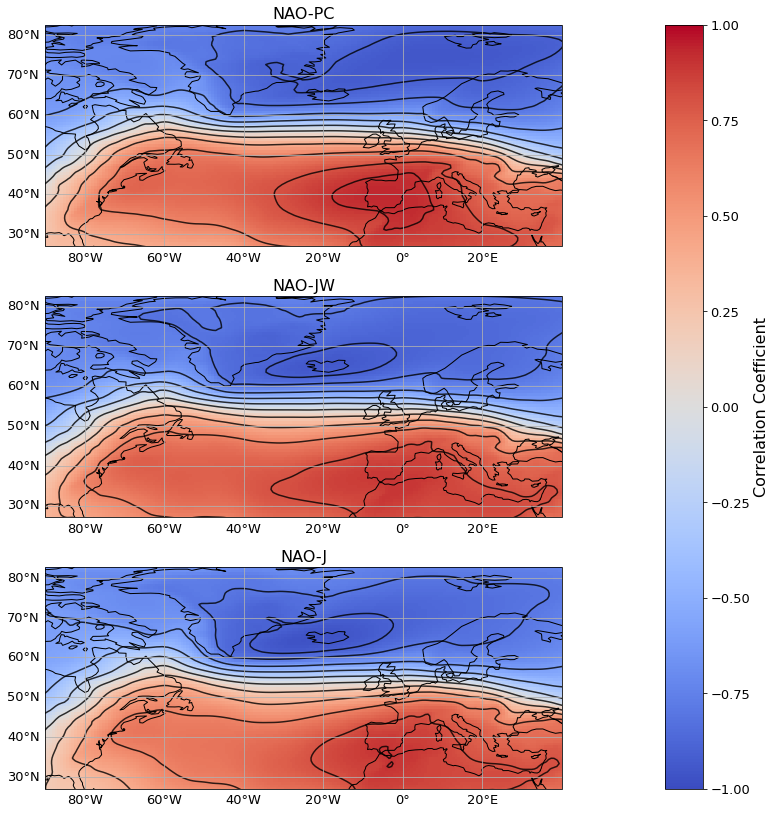

In [27]:
plt.clf()
fig, ax = plt.subplots(3,1,figsize=(30,12), subplot_kw=dict(projection=ccrs.PlateCarree()))
bbox=[-90, 40, 27, 73]
LAND = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor=cfeature.COLORS['land'])
fig.tight_layout(pad=5)
XTEXT_SIZE =13
YTEXT_SIZE =13
ax[0].set_extent(bbox)
ax[0].add_feature(LAND, facecolor='None')
gl = ax[0].gridlines(draw_labels=True)
gl.xlabel_style = {'size': XTEXT_SIZE, 'color': 'k'}
gl.ylabel_style = {'size':YTEXT_SIZE, 'color': 'k', 'weight': 'normal'}
gl.xlabels_top = gl.ylabels_right = False
x,y = lons,lats
data = correls_PC
SEA = cfeature.NaturalEarthFeature('physical', 'ocean', '10m', edgecolor='face', facecolor=cfeature.COLORS['land'])
cs = ax[0].pcolormesh(x, y, data, vmin=-1.0, vmax=1.0,cmap='coolwarm',)
CON =ax[0].contour(x,y, data, [-0.9,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,0.9],colors = 'black',alpha = 0.8,linestyles = 'solid')
ax[0].set_title('Plot Showing Correlation Coefficients of SLP and the PC (EOF) NAO index for ERA interim', fontsize=20)
ax[0].coastlines(resolution='110m')
ax[0].set_title('NAO-PC', fontsize=16)


ax[1].set_extent(bbox)
ax[1].add_feature(LAND, facecolor='None')
gl = ax[1].gridlines(draw_labels=True)
gl.xlabel_style = {'size': XTEXT_SIZE, 'color': 'k'}
gl.ylabel_style = {'size':YTEXT_SIZE, 'color': 'k', 'weight': 'normal'}
gl.xlabels_top = gl.ylabels_right = False
x,y = lons,lats
data = correls_JW
SEA = cfeature.NaturalEarthFeature('physical', 'ocean', '10m', edgecolor='face', facecolor=cfeature.COLORS['land'])
cs = ax[1].pcolormesh(x, y, data, vmin=-1.0, vmax=1.0,cmap='coolwarm',)
CON =ax[1].contour(x,y, data, [-0.9,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,0.9],colors = 'black',alpha = 0.8,linestyles = None)
ax[1].coastlines(resolution='110m')
ax[1].set_title('NAO-JW', fontsize=16)

ax[2].set_extent(bbox)
ax[2].add_feature(LAND, facecolor='None')
gl = ax[2].gridlines(draw_labels=True)
gl.xlabel_style = {'size': XTEXT_SIZE, 'color': 'k'}
gl.ylabel_style = {'size':YTEXT_SIZE, 'color': 'k', 'weight': 'normal'}
gl.xlabels_top = gl.ylabels_right = False
x,y = lons,lats
data = correls_Jones
SEA = cfeature.NaturalEarthFeature('physical', 'ocean', '10m', edgecolor='face', facecolor=cfeature.COLORS['land'])
cs = ax[2].pcolormesh(x, y, data, vmin=-1.0, vmax=1.0,cmap='coolwarm',)
CON =ax[2].contour(x,y, data, [-0.9,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,0.9],colors = 'black',alpha = 0.8,linestyles = None)
ax[2].coastlines(resolution='110m')
ax[2].set_title('NAO-J', fontsize=16)
cbar = fig.colorbar(cs, ax=ax)
cbar.ax.tick_params(labelsize=13)
cbar.set_label('Correlation Coefficient',fontsize =16)

plt.savefig('Finished_Plots/NAO_SLP_correlations.png',dpi=500)

## Mean Explained Variance 

In [77]:
print(np.shape(correls_PC))
print(len(lats))

(92, 214)
92


In [80]:
mean_jw = 0
mean_pc = 0
mean_jones = 0
tot = 0
for i in range(len(lats)):
    for j in range(len(lons)):
        tot += 1*np.cos(lats[i]/180)
for i in range(len(lats)):
    for j in range(len(lons)):
        if np.isnan(np.cos(lats[i]/180)*(correls_JW[i,j]**2)/tot) == True:
            pass
        elif np.isinf(np.cos(lats[i]/180)*(correls_JW[i,j]**2)/tot)== True:
            pass
        elif np.cos(lats[i]/180)*(correls_JW[i,j]**2)/tot>1:
            pass
        else:
            mean_pc += np.cos(lats[i]/180)*(correls_JW[i,j]**2)/tot
            print(np.cos(lats[i]/180)*(correls_JW[i,j]**2)/tot)
        

        
for i in range(len(lats)):
    for j in range(len(lons)):        
        if np.isnan(np.cos(lats[i]/180)*(correls_PC[i,j]**2)/tot) == True:
            pass
        elif np.isinf(np.cos(lats[i]/180)*(correls_PC[i,j]**2)/tot)== True:
            pass
        elif np.cos(lats[i]/180)*(correls_PC[i,j]**2)/tot>1:
            pass
        else:
            mean_jw += np.cos(lats[i]/180)*(correls_PC[i,j]**2)/tot
            print(np.cos(lats[i]/180)*(correls_PC[i,j]**2)/tot)
        
            
        
        
for i in range(len(lats)):
    for j in range(len(lons)):        
        
        if np.isnan(np.cos(lats[i]/180)*(correls_Jones[i,j]**2)/tot) == True:
            pass
        elif np.isinf(np.cos(lats[i]/180)*(correls_Jones[i,j]**2)/tot)== True:
            pass
        elif np.cos(lats[i]/180)*(correls_Jones[i,j]**2)/tot>1:
            pass
        else:
            mean_jones += np.cos(lats[i]/180)*(correls_Jones[i,j]**2)/tot
            print(np.cos(lats[i]/180)*(correls_PC[i,j]**2)/tot)
        

1.782696949258206e-05
1.7834964730386444e-05
1.7842832190757633e-05
1.7850703704131265e-05
1.7858717773541074e-05
1.786652305002484e-05
1.7874419455060406e-05
1.788241446145326e-05
1.7890439528238522e-05
1.7898315450949972e-05
1.790617068396629e-05
1.791416565110891e-05
1.7921879493905208e-05
1.7929862379305052e-05
1.793785733548368e-05
1.7945434780197737e-05
1.7952829109378037e-05
1.7960345487377247e-05
1.7967946655131626e-05
1.7975407026982465e-05
1.7982936427938604e-05
1.7990366789133797e-05
1.799788498307337e-05
1.8005356049949582e-05
1.8012759732938483e-05
1.8020326370675596e-05
1.8027739187392802e-05
1.8035182889078935e-05
1.804264642889687e-05
1.805011585132475e-05
1.8057641286608892e-05
1.8065094125091047e-05
1.807246397243764e-05
1.8079923209694674e-05
1.8087394927047667e-05
1.80949440177569e-05
1.810234310268988e-05
1.8109777275583926e-05
1.8117141696518877e-05
1.81244880884722e-05
1.8132082026579693e-05
1.813935352031817e-05
1.814678524551755e-05
1.8153834752381222e-05
1.816

/tmp/ipykernel_1813/1813953549.py:10: RuntimeWarning: overflow encountered in double_scalars
  if np.isnan(np.cos(lats[i]/180)*(correls_JW[i,j]**2)/tot) == True:
/tmp/ipykernel_1813/1813953549.py:12: RuntimeWarning: overflow encountered in double_scalars
  elif np.isinf(np.cos(lats[i]/180)*(correls_JW[i,j]**2)/tot)== True:



2.18821899012333e-05
2.1930794925468066e-05
2.197913239339232e-05
2.2027043714841213e-05
2.207768463219521e-05
2.2128019225598045e-05
2.2177924534442227e-05
2.2227411562343968e-05
2.227640829884881e-05
2.2325108883168497e-05
2.2373387775026954e-05
2.24211811369076e-05
2.2471064490753743e-05
2.2520645212914436e-05
2.25697332720209e-05
2.261854228118523e-05
2.266701265522401e-05
2.2714989644973084e-05
2.2762528654185647e-05
2.2809909942429482e-05
2.2852625931044416e-05
2.2894979617161805e-05
2.2937066802624082e-05
2.2978910003301238e-05
2.302032770797571e-05
2.3061505204947936e-05
2.3102288015126834e-05
2.3142611298533663e-05
2.31695947759068e-05
2.319596895043948e-05
2.3221990702840958e-05
2.32478713190321e-05
2.3273394958036808e-05
2.3298378837740447e-05
2.3323075741509984e-05
2.3347537630503453e-05
2.33636385182413e-05
2.3379305938558918e-05
2.3394639754244596e-05
2.340924506825295e-05
2.3423361239669978e-05
2.3437232810371875e-05
2.3450570309976867e-05
2.3463431954806934e-05
2.34852

/tmp/ipykernel_1813/1813953549.py:24: RuntimeWarning: overflow encountered in double_scalars
  if np.isnan(np.cos(lats[i]/180)*(correls_PC[i,j]**2)/tot) == True:
/tmp/ipykernel_1813/1813953549.py:26: RuntimeWarning: overflow encountered in double_scalars
  elif np.isinf(np.cos(lats[i]/180)*(correls_PC[i,j]**2)/tot)== True:


2.563892025094285e-05
2.5677951322836755e-05
2.5716707026344967e-05
2.575700998378751e-05
2.5797236532789476e-05
2.5837318059710778e-05
2.5876958722557937e-05
2.5916023642504645e-05
2.5954862152402488e-05
2.5993086801840767e-05
2.603100524383678e-05
2.606866418367637e-05
2.6105611530995695e-05
2.614261863053082e-05
2.6178863211905078e-05
2.621478670847205e-05
2.6250198274785382e-05
2.6285410056709508e-05
2.6320153234037745e-05
2.6354322072637354e-05
2.6388113898230835e-05
2.6421526329042243e-05
2.6454532288854535e-05
2.648717696983987e-05
2.651935476372868e-05
2.6551166530984996e-05
2.6577672893996524e-05
2.6603801371669154e-05
2.662944957491334e-05
2.665473259468194e-05
2.667950723156202e-05
2.670404883429021e-05
2.672798748605385e-05
2.6751557765894894e-05
2.6774824133416802e-05
2.679761430160529e-05
2.6819928634980882e-05
2.683706789590242e-05
2.6850437857298418e-05
2.6863468237687064e-05
2.687600385140453e-05
2.6888315825587383e-05
2.6900107809471813e-05
2.6911319654085035e-05
2.69

/tmp/ipykernel_1813/1813953549.py:40: RuntimeWarning: overflow encountered in double_scalars
  if np.isnan(np.cos(lats[i]/180)*(correls_Jones[i,j]**2)/tot) == True:
/tmp/ipykernel_1813/1813953549.py:42: RuntimeWarning: overflow encountered in double_scalars
  elif np.isinf(np.cos(lats[i]/180)*(correls_Jones[i,j]**2)/tot)== True:
/tmp/ipykernel_1813/1813953549.py:48: RuntimeWarning: overflow encountered in double_scalars
  print(np.cos(lats[i]/180)*(correls_PC[i,j]**2)/tot)



2.2662855422177572e-05
2.268748339393268e-05
2.2712276117610823e-05
2.273681347524495e-05
2.276142695095719e-05
2.2785950338276202e-05
2.281033862371464e-05
2.2834721518295423e-05
2.2859044454092763e-05
2.2883288843465646e-05
2.290749595825497e-05
2.2931371198246746e-05
2.295546138460044e-05
2.297935606256955e-05
2.3002939354266502e-05
2.302675492850537e-05
2.3050715256800942e-05
2.3074323241430573e-05
2.30980357770647e-05
2.3121896147863152e-05
2.3145313599462102e-05
2.316863609868263e-05
2.319187547591745e-05
2.321514940758393e-05
2.3238533242120087e-05
2.3261537062011955e-05
2.3284601873728753e-05
2.330730687317825e-05
2.3330207293888606e-05
2.335289328055712e-05
2.3375437870581362e-05
2.3397743805066563e-05
2.3420174254576303e-05
2.344208358185896e-05
2.3464349382352545e-05
2.3486233654313754e-05
2.350802181305523e-05
2.3529851433812073e-05
2.355145699495785e-05
2.3573016151281524e-05
2.35943874319798e-05
2.3615741484904198e-05
2.3637010719586918e-05
2.3658164197313965e-05
2.36786

In [81]:
print(mean_jw, mean_pc, mean_jones)

0.4739844143859269 0.46360456044389786 0.4233865403587382
